In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import espra, plot_ellipse, unit_det


In [2]:
width=500
x = np.linspace(-width // 2, width // 2, 101)
y = np.linspace(-width // 2, width // 2, 101)
X, Y = np.meshgrid(x, y, indexing='ij')

xc, yc = 0.0, 0.0
Q11, Q12, Q22 = 1, .4, 1
psi0 = 250.0
Rc = 85.0
A = - psi0 / Rc**2

# rescale Q to have unit determinant
Q, _ = unit_det(Q=np.array([[Q11, Q12], [Q12, Q22]]))
q11, q12, q22 = Q[0,0], Q[0,1], Q[1,1]

df_res = pd.DataFrame({'xc': [xc], 'yc': [yc], 'w': [2*A*(q11+q22)], 'q11': [q11], 'q12': [q12], 'q22': [q22],
                        'Rc': [Rc], 'psi0': [psi0], 'A': [A]})

dx, dy = X - xc, Y - yc
rho2 = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
Qr2 = (q11*dx + q12*dy)**2 + (q12*dx + q22*dy)**2 # ||Qr||
psi = psi0 * np.exp( - rho2 / Rc**2 )
u =   psi0 * np.exp( - rho2 / Rc**2 ) * ( 2*q12*dx + 2*q22*dy ) / Rc**2
v = - psi0 * np.exp( - rho2 / Rc**2 ) * ( 2*q11*dx + 2*q12*dy ) / Rc**2

df_res


,xc,yc,w,q11,q12,q22,Rc,psi0,A
0,0.0,0.0,-0.151016,1.091089,0.436436,1.091089,85.0,250.0,-0.034602


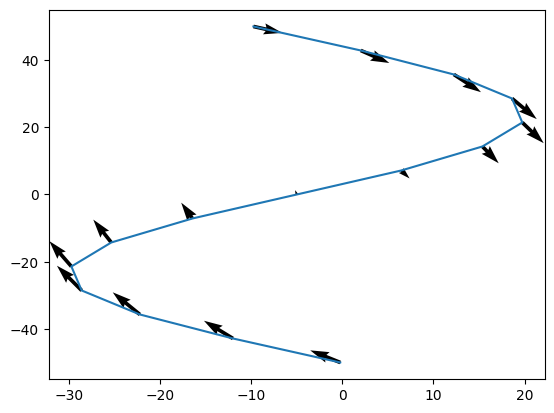

In [3]:
y_squ = np.linspace(-50, 50, 15)
x_squ = 25*np.sin(y_squ/15) - 5

plt.plot(x_squ, y_squ)

from scipy.interpolate import RegularGridInterpolator
interp_u = RegularGridInterpolator((y, x), u.T)
interp_v = RegularGridInterpolator((y, x), v.T)
points = np.vstack([y_squ, x_squ]).T
u_squ = interp_u(points)
v_squ = interp_v(points)

plt.quiver(x_squ, y_squ, u_squ, v_squ)



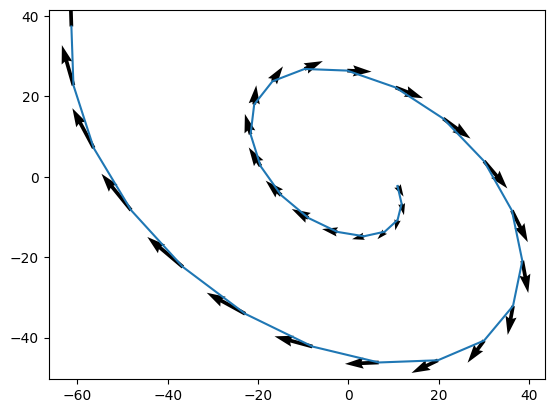

In [4]:
# drifter
N = 1
# x_d = np.random.uniform(-10, 10, N)
# print(x_d)
x_d = np.array([8.5356055])
# y_d = np.random.uniform(-10, 10, N)
# print(y_d)
y_d = np.array([1.8288253])

# Simulation params
dt = 6
steps = 30

trajectories_x = [x_d.copy()]
trajectories_y = [y_d.copy()]
trajectories_u = [np.full(N, np.nan)]
trajectories_v = [np.full(N, np.nan)]

for _ in range(steps):
    points = np.vstack([y_d, x_d]).T
    ud = interp_u(points)
    vd = interp_v(points)

    x_d += ud * dt
    y_d += vd * dt

    trajectories_x.append(x_d.copy())
    trajectories_y.append(y_d.copy())
    trajectories_u.append(ud.copy())
    trajectories_v.append(vd.copy())

# Convert to arrays
x_drif = np.array(trajectories_x)[1:]
y_drif = np.array(trajectories_y)[1:]
u_drif = np.array(trajectories_u)[1:]
v_drif = np.array(trajectories_v)[1:]


x_drif = [val[0] for val in x_drif]
y_drif = [val[0] for val in y_drif]
u_drif = [val[0] for val in u_drif]
v_drif = [val[0] for val in v_drif]

plt.plot(x_drif, y_drif)
plt.quiver(x_drif, y_drif, u_drif, v_drif)


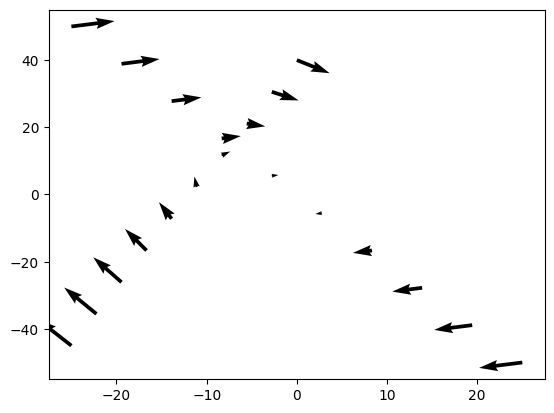

In [5]:
scaling = 5

x_l1 = np.linspace(-5*scaling, 0*scaling, 10)
y_l1 = np.linspace(-9*scaling, 8*scaling, 10)
points = np.vstack([y_l1, x_l1]).T
u_l1 = interp_u(points)
v_l1 = interp_v(points)
plt.quiver(x_l1, y_l1, u_l1, v_l1)

x_l2 = np.linspace(-5*scaling, 5*scaling, 10)
y_l2 = np.linspace(10*scaling, -10*scaling, 10)
points = np.vstack([y_l2, x_l2]).T
u_l2 = interp_u(points)
v_l2 = interp_v(points)
plt.quiver(x_l2, y_l2, u_l2, v_l2)

x_l = np.array(list(x_l1) + list(x_l2))
y_l = np.array(list(y_l1) + list(y_l2))
u_l = np.array(list(u_l1) + list(u_l2))
v_l = np.array(list(v_l1) + list(v_l2))


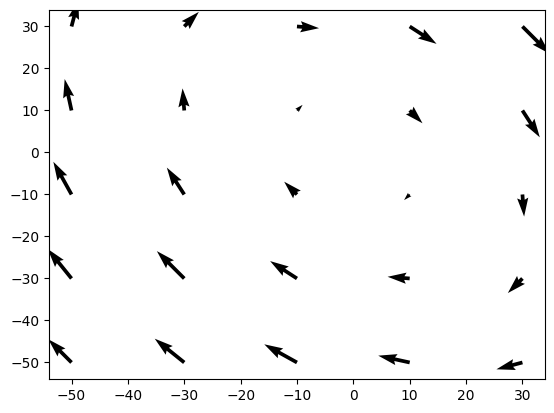

In [6]:
x_p = np.arange(-50, 50, 20)
y_p = np.arange(-50, 50, 20)
x_p, y_p = np.meshgrid(x_p, y_p)
x_p, y_p = x_p.flatten(), y_p.flatten()
points = np.vstack([y_p, x_p]).T
u_p = interp_u(points)
v_p = interp_v(points)
plt.quiver(x_p, y_p, u_p, v_p)


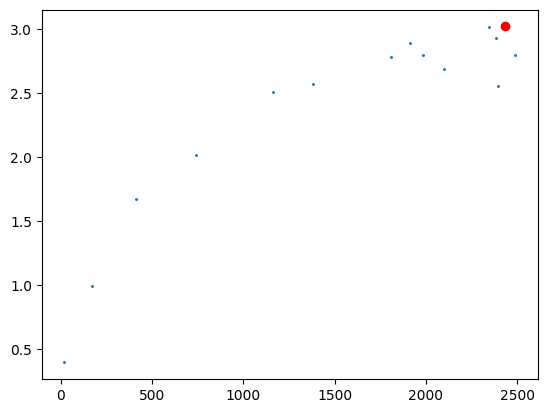

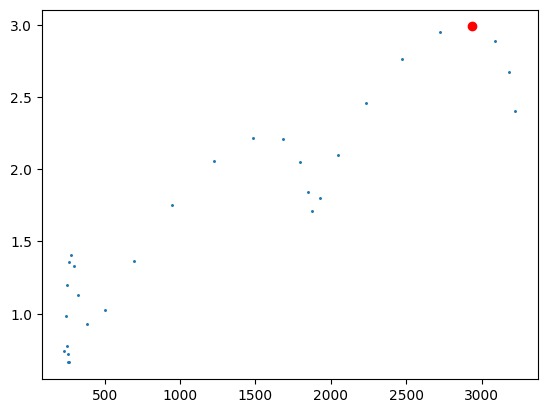

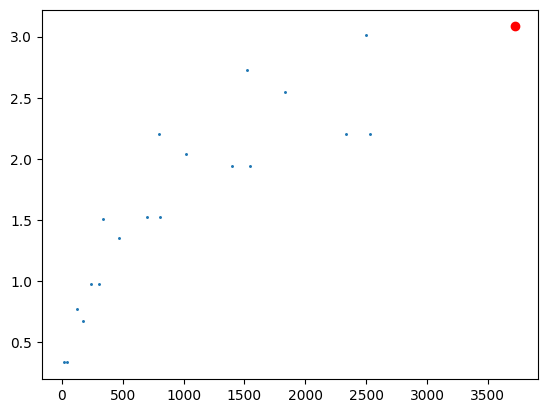

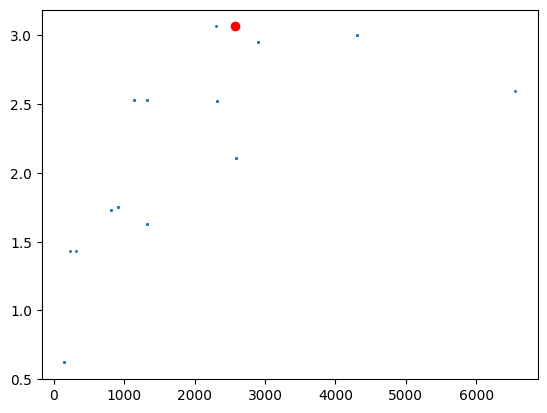

In [7]:
xc, yc, w, Q, Rc, psi0 = espra(x_squ, y_squ, u_squ, v_squ, plot_flag=True)
A = - psi0 / Rc**2
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w, 'q11': Q[0,0], 'q12': Q[1,0], 'q22': Q[1,1],
                        'Rc': Rc, 'psi0': psi0, 'A': A}

xc, yc, w, Q, Rc, psi0 = espra(x_drif, y_drif, u_drif, v_drif, plot_flag=True)
A = - psi0 / Rc**2
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w, 'q11': Q[0,0], 'q12': Q[1,0], 'q22': Q[1,1],
                        'Rc': Rc, 'psi0': psi0, 'A': A}

xc, yc, w, Q, Rc, psi0 = espra(x_l, y_l, u_l, v_l, plot_flag=True)
A = - psi0 / Rc**2
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w, 'q11': Q[0,0], 'q12': Q[1,0], 'q22': Q[1,1],
                        'Rc': Rc, 'psi0': psi0, 'A': A}

xc, yc, w, Q, Rc, psi0 = espra(x_p, y_p, u_p, v_p, plot_flag=True)
A = - psi0 / Rc**2
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w, 'q11': Q[0,0], 'q12': Q[1,0], 'q22': Q[1,1],
                        'Rc': Rc, 'psi0': psi0, 'A': A}


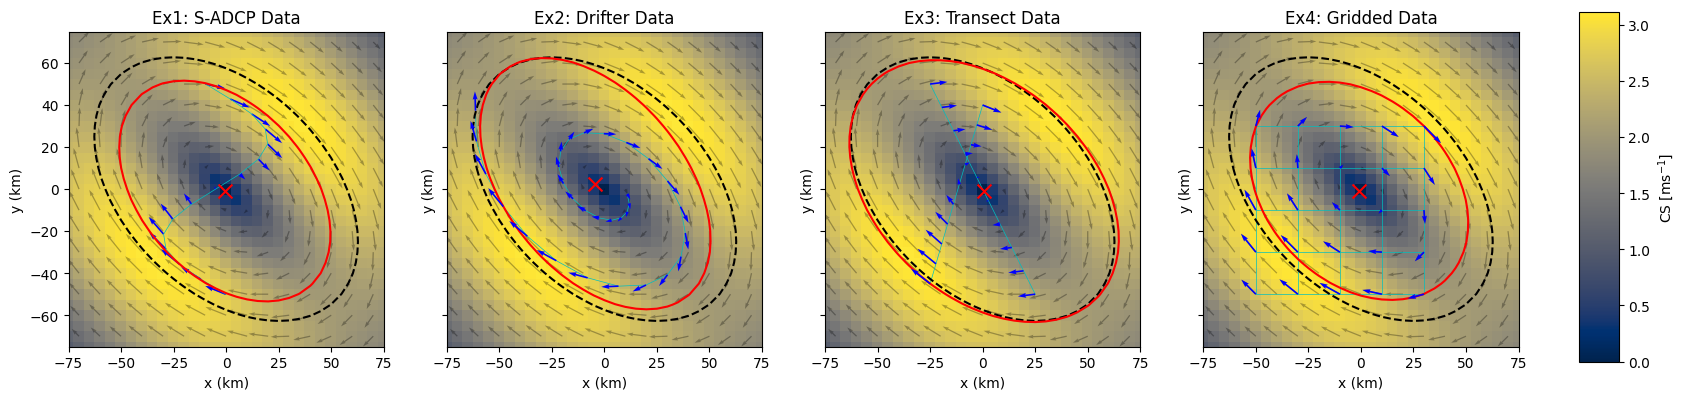

,xc,yc,w,q11,q12,q22,Rc,psi0,A
Control,0.000000,0.000000,-0.151016,1.091089,0.436436,1.091089,85.000000,250.000000,-0.034602
Ex1,-0.610363,-0.920980,-0.115484,1.136969,0.426742,1.039702,69.748664,129.054279,-0.026528
Ex2,-4.323280,2.582760,-0.105287,1.219354,0.499089,1.024386,76.657178,137.872603,-0.023462
Ex2,0.661206,-0.950574,-0.111795,1.044989,0.393953,1.105466,86.298707,193.584145,-0.025993
Ex3,-0.840778,-0.840778,-0.098725,1.046659,0.309022,1.046659,71.818135,121.626541,-0.023581


In [8]:
clr = 'b'
scat_scale = 1

fig, axs = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=False, sharey=True, sharex=True)

cmap = 'cividis'
spacing, scale, width = 2, 40, 0.004
wid = 1.3

# ---- plot background pcolor + quiver on each axis ----
for ax in axs:
    pc = ax.pcolor(x, y, np.hypot(u, v).T, cmap=cmap)
    ax.quiver(
        x[::spacing], y[::spacing],
        u[::spacing, ::spacing].T, v[::spacing, ::spacing].T,
        alpha=0.3, scale=scale, width=width, zorder=1
    )
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-75, 75)
    ax.set_ylim(-75, 75)
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')

# ---- Panel 1: Example S-ADCP Data ----
axs[0].plot(x_squ, y_squ, 'c', linewidth=.5)
axs[0].quiver(x_squ, y_squ, u_squ, v_squ, scale=scale*scat_scale, width=width*wid, color=clr)
axs[0].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2],
                     colors='k', linestyles='--')
data = df_res.iloc[1]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[0].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[0].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[0].set_title('Ex1: S-ADCP Data')

# ---- Panel 2: Example Drifter Data ----
axs[1].plot(x_drif, y_drif, 'c', linewidth=.5)
axs[1].quiver(x_drif, y_drif, u_drif, v_drif, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[1].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2],
                     colors='k', linestyles='--')
data = df_res.iloc[2]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[1].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[1].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[1].set_title('Ex2: Drifter Data')

# ---- Panel 3: Example Transect Data ----
axs[2].plot(x_l1, y_l1, 'c', linewidth=.5)
axs[2].plot(x_l2, y_l2, 'c', linewidth=.5)
axs[2].quiver(x_l1, y_l1, u_l1, v_l1, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[2].quiver(x_l2, y_l2, u_l2, v_l2, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[2].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2],
                     colors='k', linestyles='--')
data = df_res.iloc[3]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[2].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[2].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[2].set_title('Ex3: Transect Data')

# ---- Panel 4: Example Gridded Data ----
# horizontal transects
for i in range(0, 25, 5):
    axs[3].plot([x_p[i], x_p[i+4]], [y_p[i], y_p[i+4]], 'c', linewidth=.5)
# vertical transects
for i in range(5):
    axs[3].plot([x_p[i], x_p[i+20]], [y_p[i], y_p[i+20]], 'c', linewidth=.5)
axs[3].quiver(x_p, y_p, u_p, v_p, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[3].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2],
                     colors='k', linestyles='--')
data = df_res.iloc[4]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[3].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[3].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[3].set_title('Ex4: Gridded Data')

# ---- now place one colorbar to the right of the entire figure ----
# leave room on the right
fig.subplots_adjust(right=0.85)

# [left, bottom, width, height] in figure coords
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, orientation='vertical', label=r'CS [ms$^{-1}$]')

plt.show()
df_res.index = ['Control', 'Ex1', 'Ex2', 'Ex2', 'Ex3']
df_res
